In [1]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rlmh_v1.vrptw import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P03_MSIE\T12_r202_25


In [2]:
folder = "R_20251120_124119"
prefix = "sol"
it = 118135

In [3]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_exp.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,idx_iteration,F,CR,MG,best_solution,convergence_rate,std_population,...,patience_remaining,F_sc,CR_sc,MG_sc,best_solution_sc,std_population_sc,best_trial_fitness_sc,std_trial_fitness_sc,patience_remaining_sc,TimeLimit.truncated
463,"[0.47788429260253906, 0.4991734027862549, 0.42...",0.000076,False,4639,9.557686,0.999173,0.928347,429.285837,1.0,60.773614,...,41,0.477884,0.499173,0.428347,0.429286,0.060774,0.607527,0.128826,0.05125,False
464,"[0.4975758194923401, 0.49931800365448, 0.48057...",0.000067,False,4649,9.951516,0.999318,0.980576,429.285837,1.0,52.930557,...,31,0.497576,0.499318,0.480576,0.429286,0.052931,0.580167,0.106777,0.03875,False
465,"[0.4992915391921997, 0.49969708919525146, 0.42...",0.000059,False,4659,9.985831,0.999697,0.929174,429.285837,1.0,65.098524,...,21,0.499292,0.499697,0.429174,0.429286,0.065099,0.566549,0.115277,0.02625,False
466,"[0.4981321692466736, 0.4996519684791565, 0.422...",0.000052,False,4669,9.962643,0.999652,0.922712,429.285837,1.0,78.279425,...,11,0.498132,0.499652,0.422712,0.429286,0.078279,0.559419,0.116600,0.01375,False
467,"[0.49680793285369873, 0.4996145963668823, 0.45...",0.000046,False,4679,9.936159,0.999615,0.956507,429.285837,1.0,57.166330,...,1,0.496808,0.499615,0.456507,0.429286,0.057166,0.619978,0.095301,0.00125,False


In [4]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_vrp.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 111.94011, Episode Length: 469, Best Solution: 429.2858368592013


Best global solution: 429.2858368592013


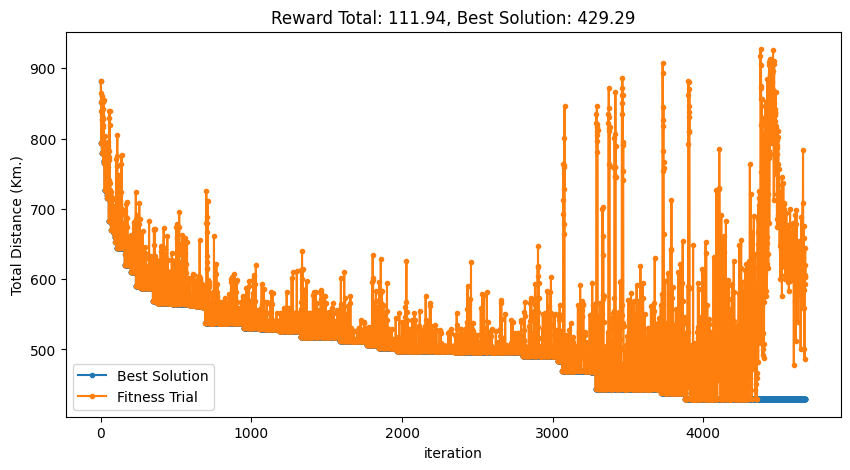

In [5]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history)
y2 = np.array(fitness_trial_history)
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [6]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

429.2858368592013


[0.44400834, 0.        , 0.32686705, 0.13424142, 0.73492221, 0.89339707,
 0.83771737, 0.85551185, 0.34828394, 0.39627932, 0.79617443, 0.32929934,
 0.75788714, 0.53701612, 0.52877004, 0.56649682, 0.64400691, 0.88918532,
 0.80317874, 0.3917361 , 0.00857059, 0.12206844, 0.09298031, 0.20063609,
 0.19599675, 0.28318516, 0.55810731, 0.62288842, 0.45818074, 0.24695487,
 0.09363911, 0.83927239, 0.0963526 , 0.44387974, 0.35111617, 0.31908849,
 0.24141153, 0.53742228, 0.7207014 , 0.2869697 , 0.75605065, 0.67051523,
 0.42519357, 0.43760494, 0.35580338, 0.16361354, 0.67183542, 1.        ,
 0.92147869, 0.63508416]


<Axes: >

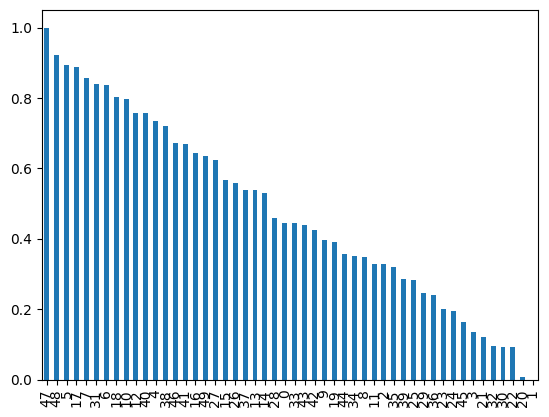

In [7]:
# How to visualize population
best_individual = population[idx_min]
string_representation = np.array2string(best_individual, separator=', ')
print(string_representation)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [8]:
vrptw.objective_func(population[idx_min])

429.2858368592013

In [9]:
exp.columns

Index(['action', 'reward', 'done', 'idx_iteration', 'F', 'CR', 'MG',
       'best_solution', 'convergence_rate', 'std_population',
       'total_iteration', 'best_trial_fitness', 'std_trial_fitness',
       'patience_remaining', 'F_sc', 'CR_sc', 'MG_sc', 'best_solution_sc',
       'std_population_sc', 'best_trial_fitness_sc', 'std_trial_fitness_sc',
       'patience_remaining_sc', 'TimeLimit.truncated'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

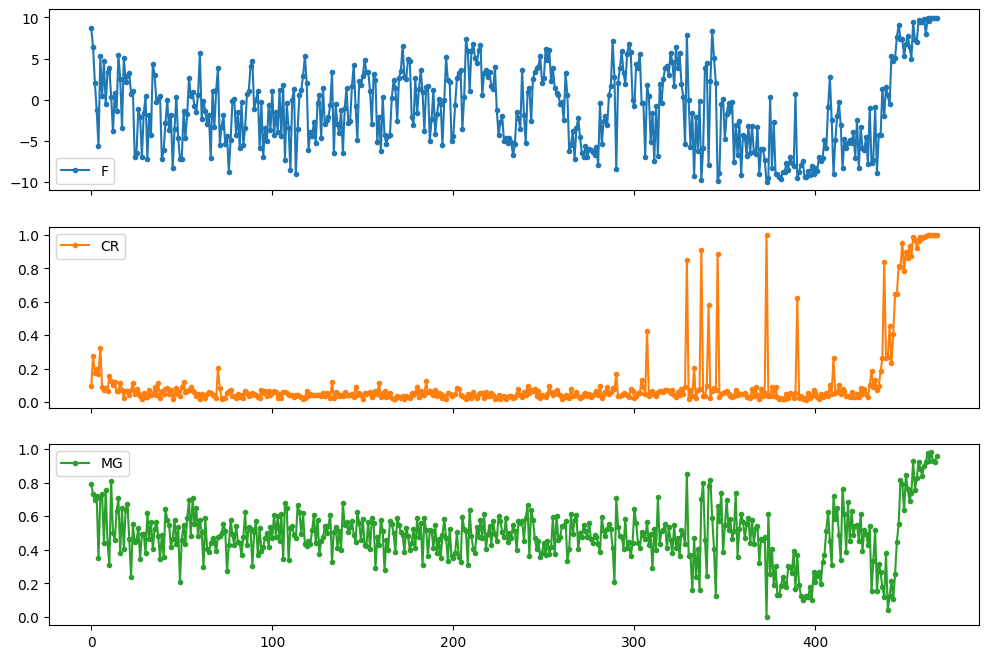

In [10]:
# Plot F, CR, MG over time in 3 subplots
exp[["F", "CR", "MG"]].plot(figsize=(12,8), marker=".", subplots=True)